In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the shape of the tensor
shape = (4, 10, 3)

# Create a random tensor of the given shape
tensor = np.random.rand(*shape)

mult_lst=[1,2,4,6]

D_title={0:"AFR",1:"EAS",2:"EUR"}
for i,mult in enumerate(mult_lst):
    f=open(f"Table2_BERNOULLI_bootstrap_{mult}TIMESBIGGER_multipleITER.txt","r")
    f=np.array([x.strip("\n") for x in f.readlines() if "@" not in x and "EVALUATION" not in x])#[:40]
    res_30=[]
    for k,pop_idx in enumerate(D_title):
        res_30.append(np.array([float(x.split(":")[1]) for x in f[np.arange(pop_idx+1,len(f),8)]]))
    res_30=np.array(res_30).T
    tensor[i]=res_30

In [9]:
#pop_idx=0
#np.mean(tensor[0,:,0]),np.std(tensor[0,:,0])

for i,mult in enumerate(mult_lst):
    for pop_idx in [0,1,2]:
        print(mult,D_title[pop_idx],np.round(np.mean(tensor[i,:,pop_idx]),2), np.round(np.std(tensor[i,:,pop_idx]),2))

1 AFR 84.9 3.21
1 EAS 79.33 2.94
1 EUR 88.93 1.56
2 AFR 84.11 1.7
2 EAS 78.78 1.66
2 EUR 88.63 0.74
4 AFR 83.41 0.71
4 EAS 78.03 0.53
4 EUR 88.31 0.35
6 AFR 84.93 2.71
6 EAS 79.81 2.62
6 EUR 89.19 1.27


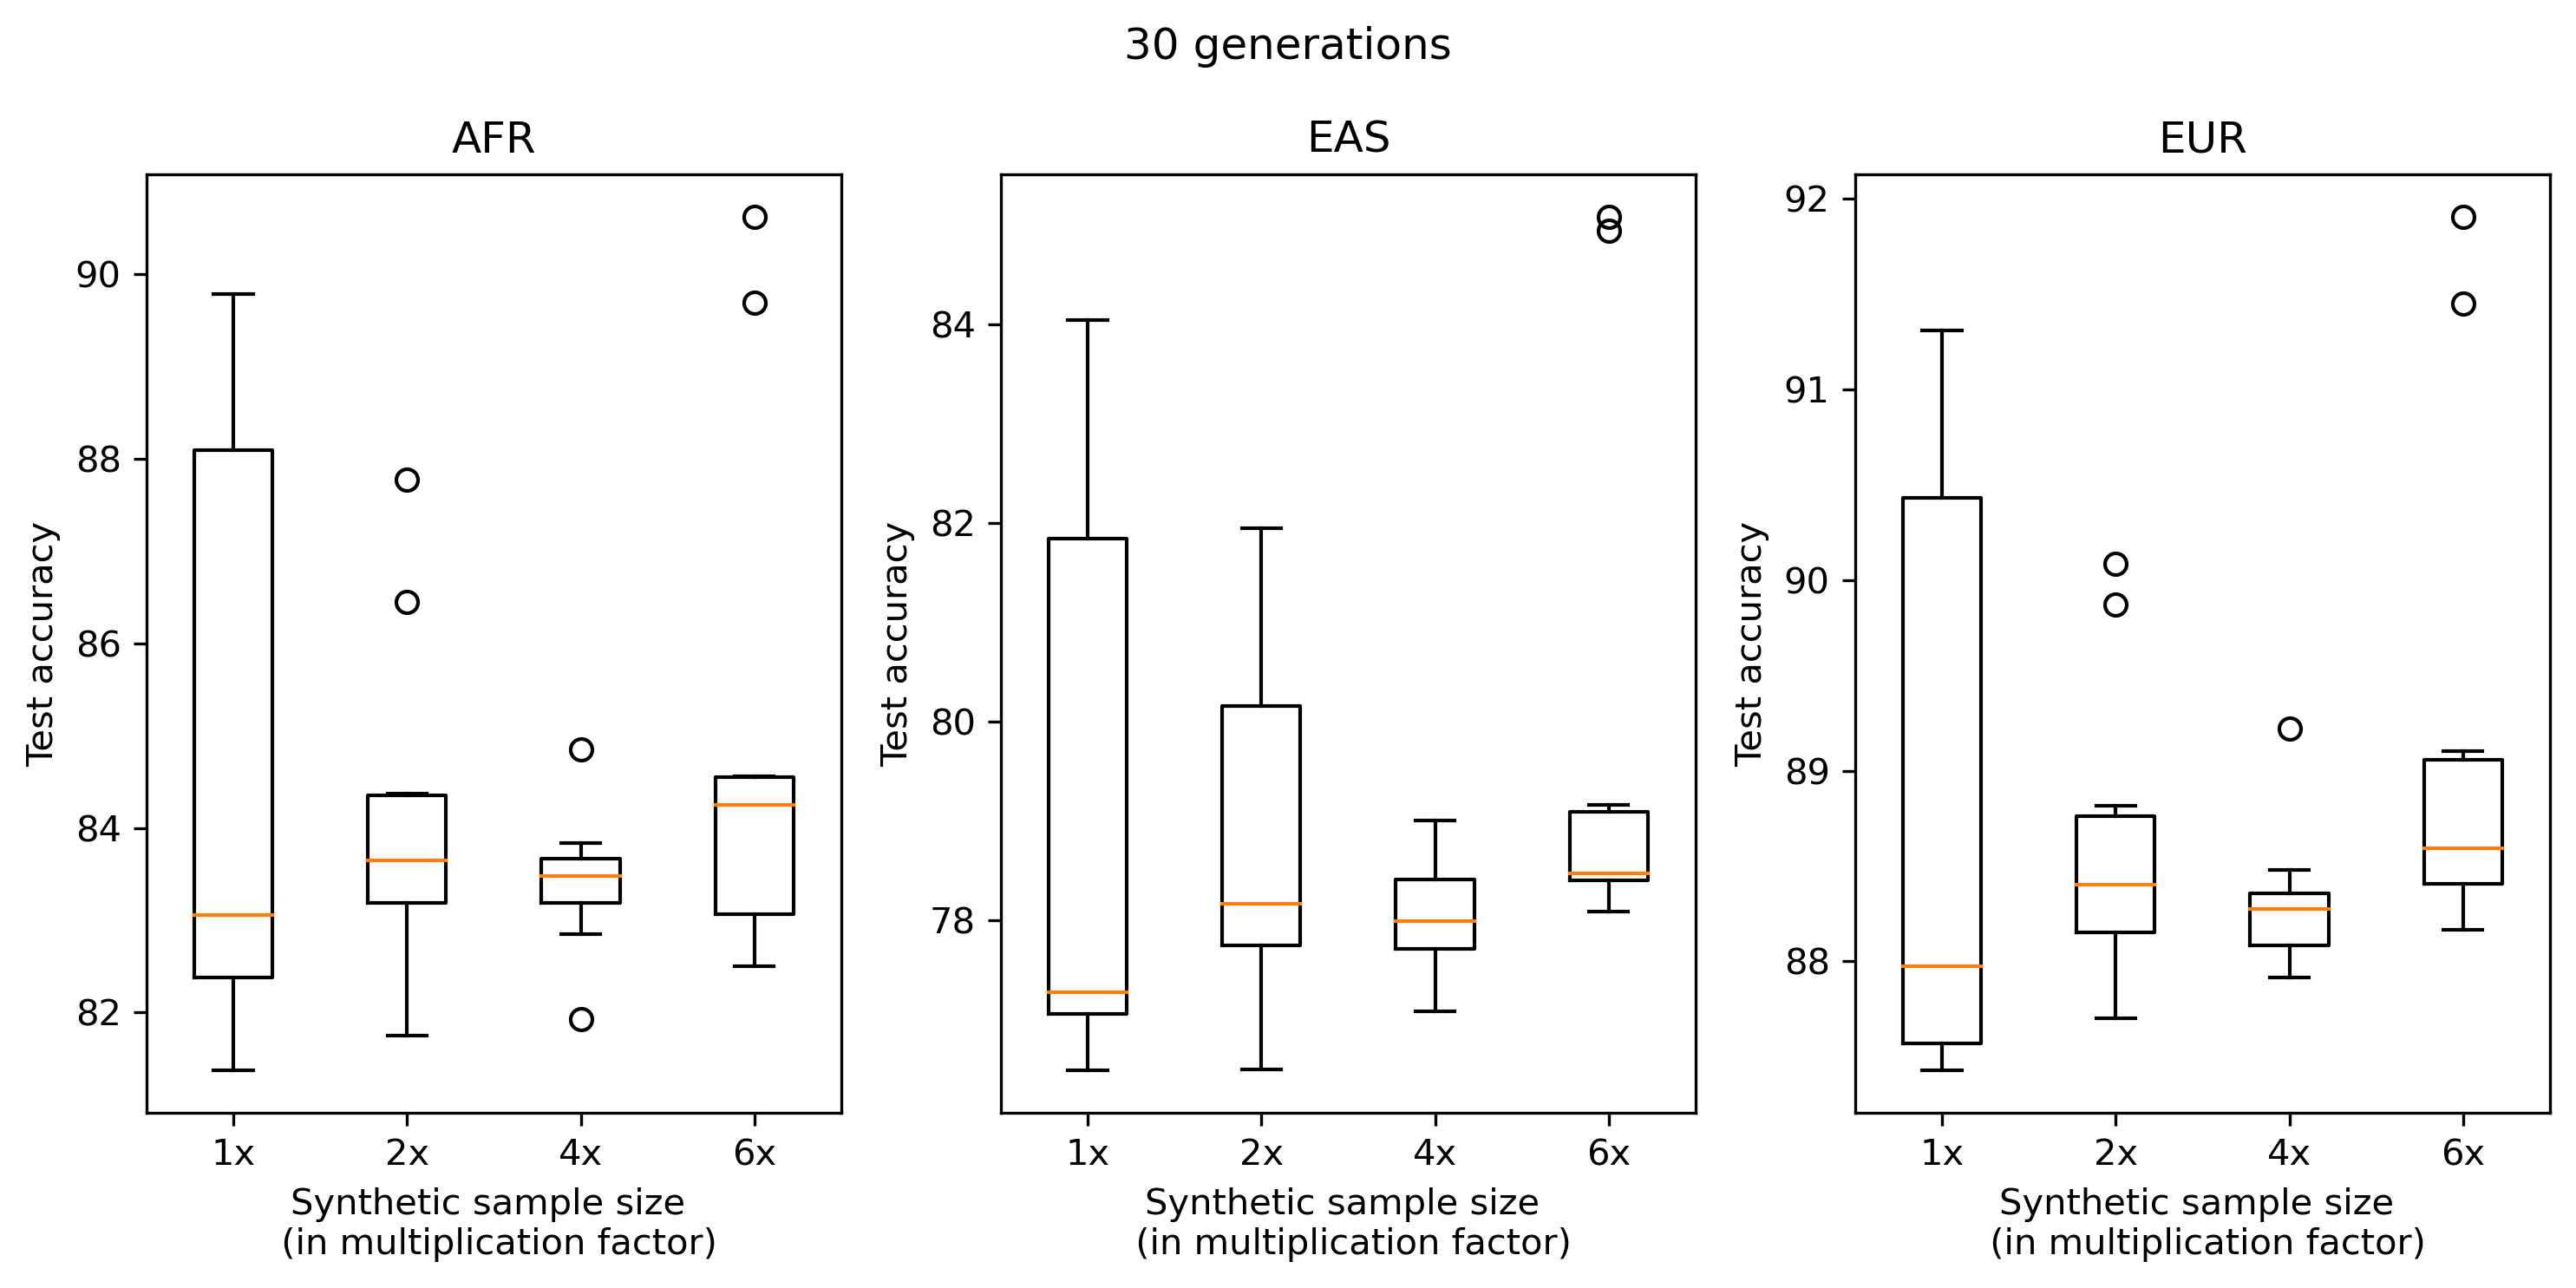

In [37]:
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(10,5),dpi=300,facecolor="white")
for i in range(3):
    ax[i].boxplot(tensor[:,:,i].T)#, tick_labels=[str(x) for x in mult_lst])
    ax[i].set_title(f"{D_title[i]}")
    ax[i].set_xticks([1, 2, 3, 4], [str(x)+"x" for x in mult_lst]) 
    ax[i].set_ylabel("Test accuracy")
    ax[i].set_xlabel("Synthetic sample size \n (in multiplication factor)")
plt.suptitle("30 generations")
fig.tight_layout()
plt.show()

In [4]:
weights=np.array([0.16,0.33,0.51])

In [5]:
res=tensor@weights

In [6]:
res.shape

(4, 10)

In [8]:
for i,mult in enumerate(mult_lst):
    print(mult,np.round(np.mean(res[i,:]),2), np.round(np.std(res[i,:]),2))

1 85.12 2.27
2 84.65 1.16
4 84.13 0.44
6 85.41 1.93


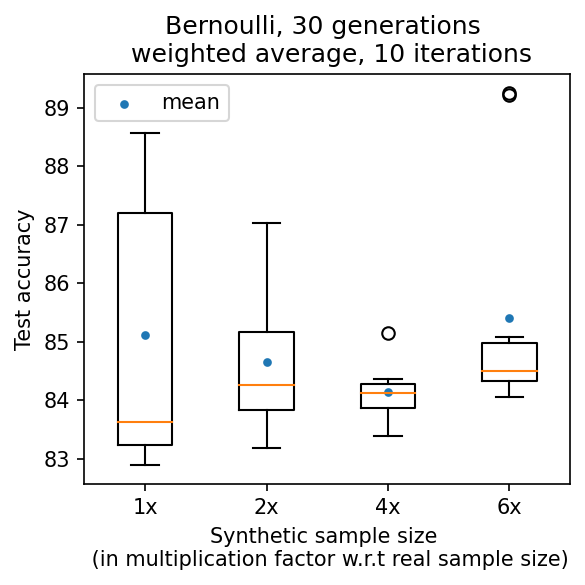

In [40]:
fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=150,facecolor="white")
ax.boxplot(res.T)
ax.scatter([1, 2, 3, 4],np.mean(res,axis=1),s=10,label="mean")
ax.set_title(f"Bernoulli, 30 generations \n weighted average, 10 iterations")
ax.set_xticks([1, 2, 3, 4], [str(x)+"x" for x in mult_lst]) 
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Synthetic sample size \n (in multiplication factor w.r.t real sample size)")
plt.legend()
fig.tight_layout()
plt.show()

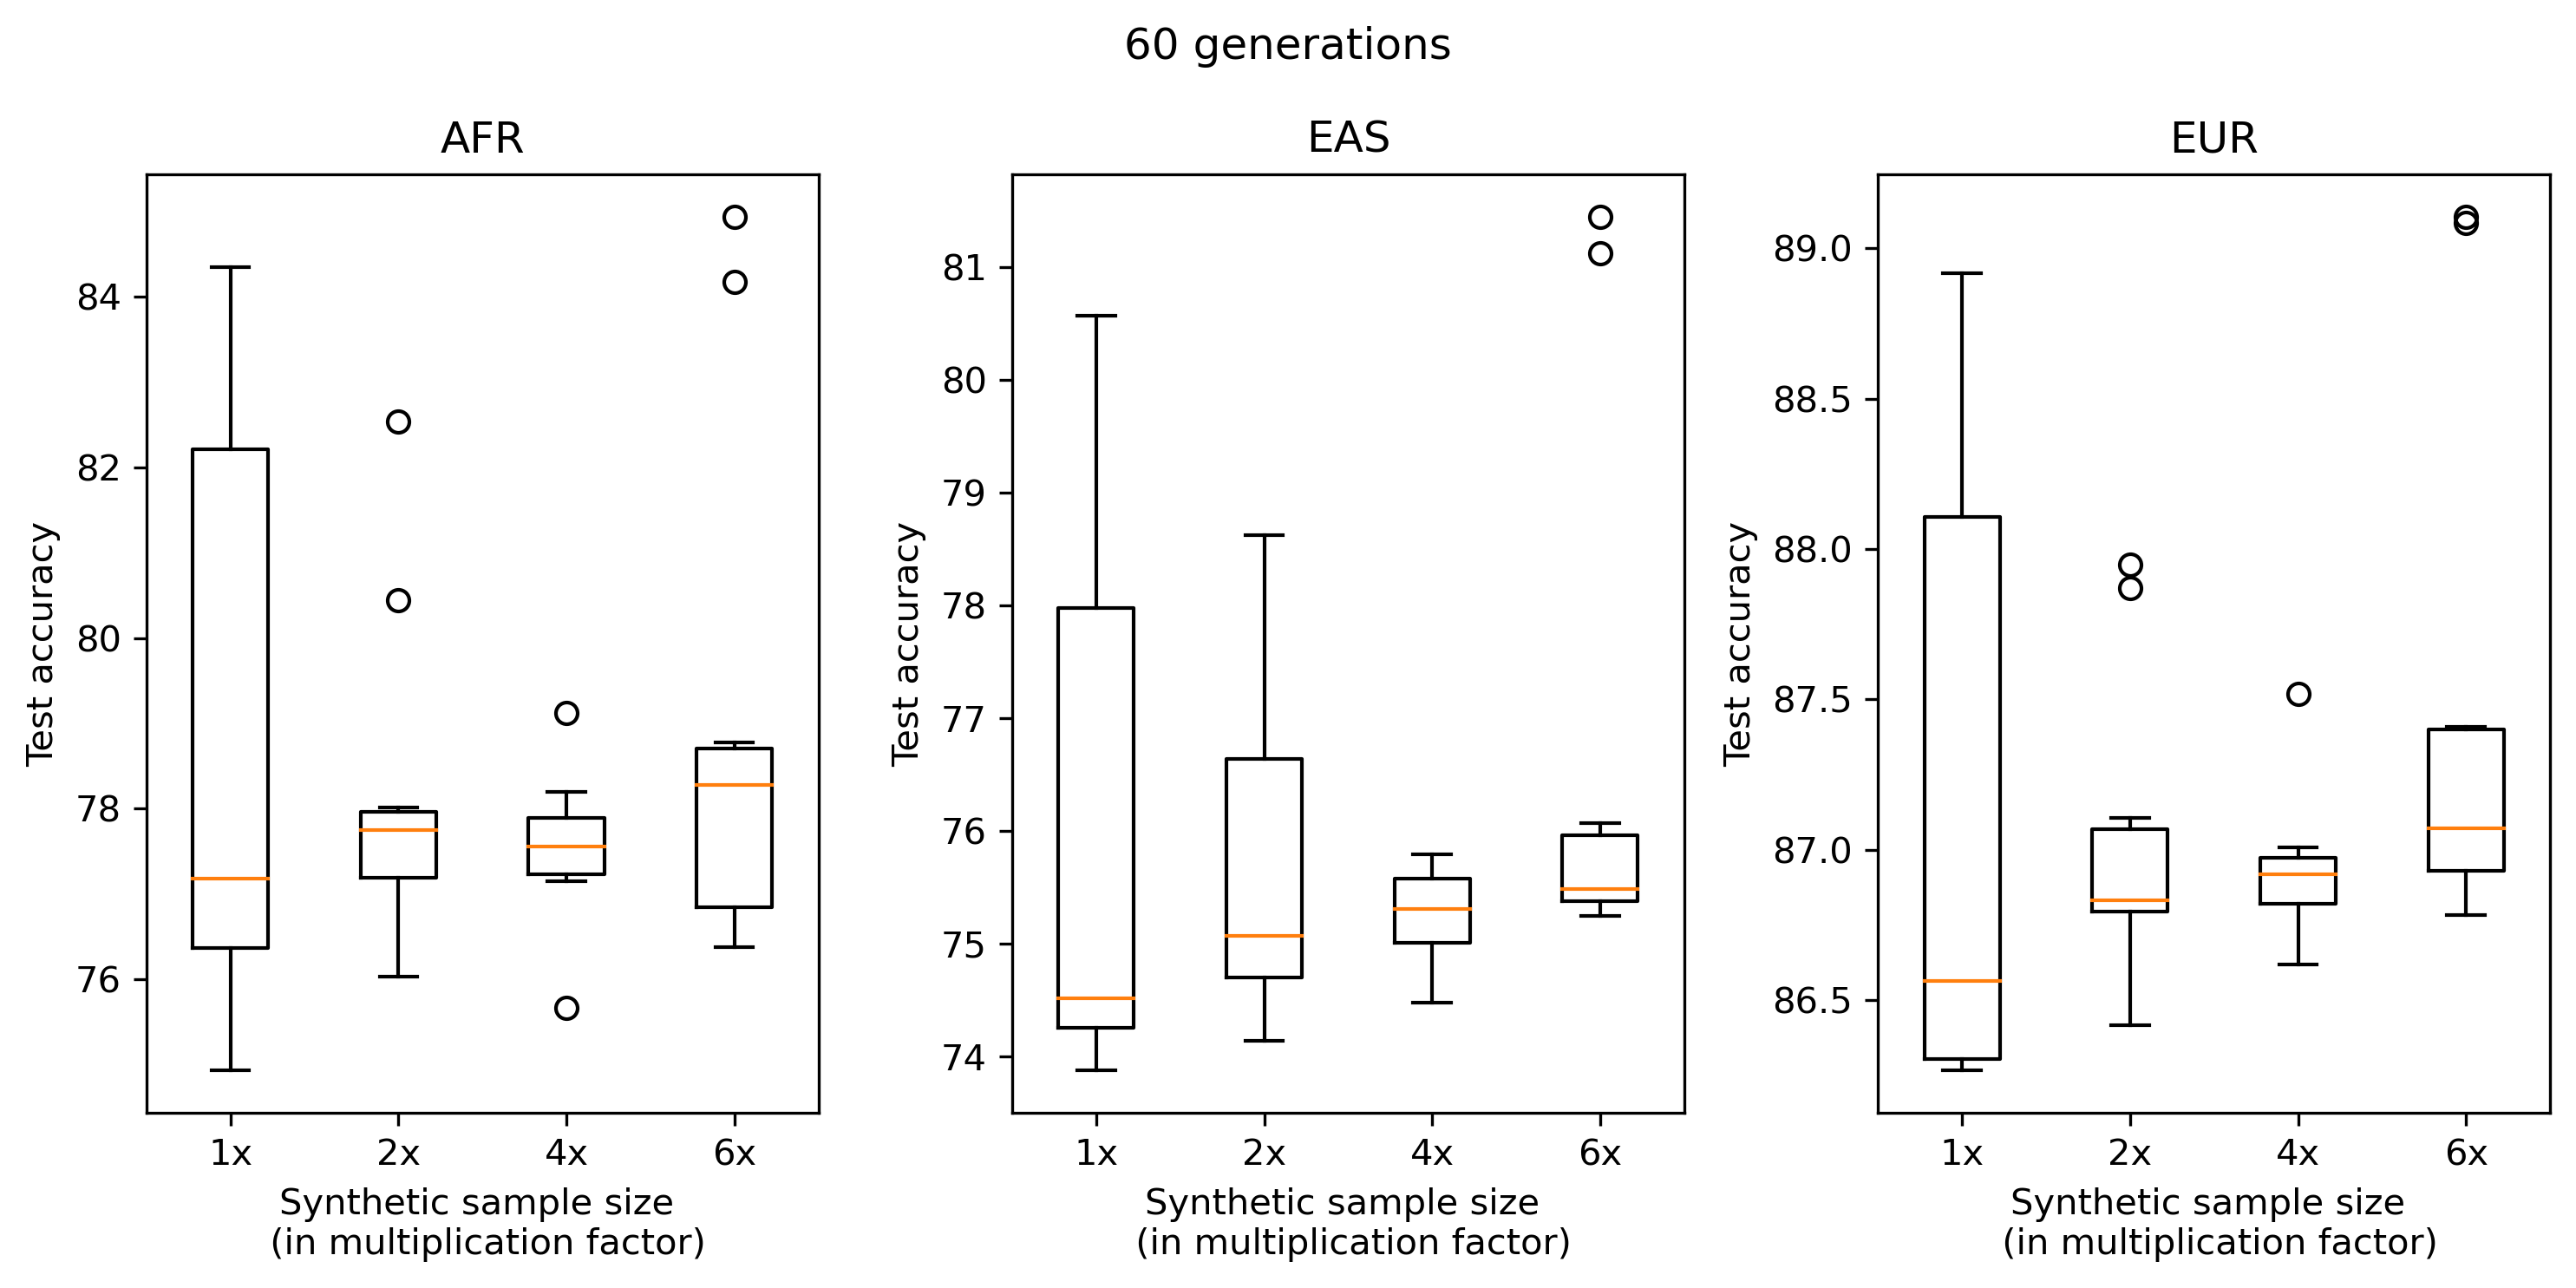

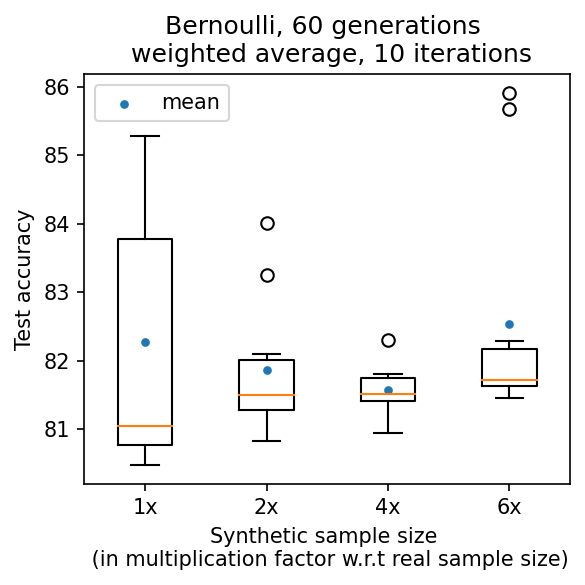

In [11]:
# Define the shape of the tensor
shape = (4, 10, 3)

# Create a random tensor of the given shape
tensor = np.random.rand(*shape)

mult_lst=[1,2,4,6]

D_title={0:"AFR",1:"EAS",2:"EUR"}
for i,mult in enumerate(mult_lst):
    f=open(f"Table2_BERNOULLI_bootstrap_{mult}TIMESBIGGER_multipleITER.txt","r")
    f=np.array([x.strip("\n") for x in f.readlines() if "@" not in x and "EVALUATION" not in x])
    res_60=[]
    for k,pop_idx in enumerate(D_title):
        res_60.append(np.array([float(x.split(":")[1]) for x in f[np.arange(pop_idx+5,len(f),8)]]))
    res_60=np.array(res_60).T
    tensor[i]=res_60
    
fig,ax=plt.subplots(ncols=3,nrows=1,figsize=(10,5),dpi=300,facecolor="white")
for i in range(3):
    ax[i].boxplot(tensor[:,:,i].T)#, tick_labels=[str(x) for x in mult_lst])
    ax[i].set_title(f"{D_title[i]}")
    ax[i].set_xticks([1, 2, 3, 4], [str(x)+"x" for x in mult_lst]) 
    ax[i].set_ylabel("Test accuracy")
    ax[i].set_xlabel("Synthetic sample size \n (in multiplication factor)")
plt.suptitle("60 generations")
fig.tight_layout()
plt.show()

res=tensor@weights

fig,ax=plt.subplots(ncols=1,nrows=1,figsize=(4,4),dpi=150,facecolor="white")
ax.boxplot(res.T)
ax.scatter([1, 2, 3, 4],np.mean(res,axis=1),s=10,label="mean")
ax.set_title(f"Bernoulli, 60 generations \n weighted average, 10 iterations")
ax.set_xticks([1, 2, 3, 4], [str(x)+"x" for x in mult_lst]) 
ax.set_ylabel("Test accuracy")
ax.set_xlabel("Synthetic sample size \n (in multiplication factor w.r.t real sample size)")
plt.legend()
fig.tight_layout()
plt.show()

In [53]:
for pop_idx in [0,1,2]:
    print(D_title[pop_idx],np.round(np.mean(tensor[0,:,pop_idx]),2), np.round(np.std(tensor[0,:,pop_idx]),2))

AFR 79.0 3.4
EAS 76.25 2.56
EUR 87.19 1.02


In [54]:
np.round(np.mean(res[0,:]),2), np.round(np.std(res[0,:]),2)

(82.27, 1.9)

In [12]:
for i,mult in enumerate(mult_lst):
    for pop_idx in [0,1,2]:
        print(mult,D_title[pop_idx],np.round(np.mean(tensor[i,:,pop_idx]),2), np.round(np.std(tensor[i,:,pop_idx]),2))

1 AFR 79.0 3.4
1 EAS 76.25 2.56
1 EUR 87.19 1.02
2 AFR 78.17 1.81
2 EAS 75.7 1.41
2 EUR 87.02 0.48
4 AFR 77.55 0.84
4 EAS 75.25 0.39
4 EUR 86.93 0.23
6 AFR 78.98 2.9
6 EAS 76.66 2.32
6 EUR 87.46 0.84


In [13]:
for i,mult in enumerate(mult_lst):
    print(mult,np.round(np.mean(res[i,:]),2), np.round(np.std(res[i,:]),2))

1 82.27 1.9
2 81.87 0.96
4 81.57 0.34
6 82.54 1.64
